In [1]:
import os
import subprocess
import sys
sys.path.append('../sdpm_py_util')
sys.path.append('../web_util')
import plotting_functions as pltfuns
import netCDF4 as nc
import web_functions as webfuns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta


In [17]:
fn='/scratch/PFM_Simulations/hycom_data/hy_ssh_2025-04-17T12:00_2025-04-19T13:00.nc'
tstr = fn[-19:-3]
tdt  = datetime.strptime(tstr,'%Y-%m-%dT%H:%M')
ds = nc.Dataset(fn)
zeta = ds.variables['surf_el']
print(np.max(np.abs(zeta[:])))
print(zeta[0:10,0:10])
print(ds.variables['surf_el'].units)
print(tstr)
print(tdt)


0.33800003
[[[ 0.09500001  0.08800001  0.081      ... -0.28100002 -0.29900002
   -0.31      ]
  [ 0.09500001  0.08800001  0.082      ... -0.273      -0.291
   -0.30600002]
  [ 0.096       0.089       0.083      ... -0.263      -0.282
   -0.30100003]
  ...
  [ 0.098       0.094       0.093      ... -0.23       -0.246
   -0.273     ]
  [ 0.098       0.09500001  0.096      ... -0.22600001 -0.24300002
   -0.272     ]
  [ 0.098       0.097       0.1        ... -0.22100002 -0.24000001
   -0.26900002]]]
m
2025-04-19T13:00
2025-04-19 13:00:00


In [11]:


ds = nc.Dataset(fn)
vars = ds.variables.keys()
print(vars)
print(ds.variables['time'][:])
# [221774.]
print(ds.variables['time'].units)



dict_keys(['lat', 'lon', 'surf_el', 'tau', 'time'])
[221773.]
hours since 2000-01-01 00:00:00


In [74]:
def webnctime_to_datetime(fn,timezone):
    ds = nc.Dataset(fn)
    time = ds.variables['time'][:]
    tref = datetime.strptime('19990101','%Y%m%d')
    times_utc = tref + time * timedelta(days=1)
    if timezone=='PDT':
        toff_hr = -7.0
    elif timezone=='PST':
        toff_hr = -8.0

    times_dt = times_utc + toff_hr/24.0 * timedelta(days=1)

    return times_dt

In [6]:

fn_grd = '/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV4_mss_oct2024.nc'
fn_his = '/scratch/PFM_Simulations/LV4_Forecast/His/LV4_ocean_his_202504170000.nc'
fn_web = '/scratch/PFM_Simulations/LV4_Forecast/His/web_data_2025041700.nc'


In [80]:
fn_web = '/scratch/PFM_Simulations/LV4_Forecast/His/web_data_2025041600.nc'
times_dt = webnctime_to_datetime(fn_web,'PDT')
dum = np.linspace(0,1,10)
#dum?
times_dt?
#print(times_dt)

Type:        MaskedArray
String form:
[datetime.datetime(2025, 4, 15, 17, 0)
           datetime.datetime(2025, 4, 15, 18, 0)
           datetime.datetime( <...> 025, 4, 20, 15, 0)
           datetime.datetime(2025, 4, 20, 16, 0)
           datetime.datetime(2025, 4, 20, 17, 0)]
Length:      121
File:        ~/anaconda3/envs/PFM-env/lib/python3.13/site-packages/numpy/ma/__init__.py
Docstring:  
An array class with possibly masked values.

Masked values of True exclude the corresponding element from any
computation.

Construction::

  x = MaskedArray(data, mask=nomask, dtype=None, copy=False, subok=True,
                  ndmin=0, fill_value=None, keep_mask=True, hard_mask=None,
                  shrink=True, order=None)

Parameters
----------
data : array_like
    Input data.
mask : sequence, optional
    Mask. Must be convertible to an array of booleans with the same
    shape as `data`. True indicates a masked (i.e. invalid) data.
dtype : dtype, optional
    Data type of the output.


In [ ]:
ds = nc.Dataset(fn_web)
vars = ds.variables.keys()
print(vars)
print(ds.variables['time'][:])
print(ds.getncattr('site info'))



dict_keys(['shoreline_dye_tot', 'shoreline_risk', 'map_dye_tot', 'sites_dye_tot', 'sites_risk', 'map_lat', 'map_lon', 'shoreline_lat', 'shoreline_lon', 'time', 'sites_lat', 'sites_lon', 'thresh_holds'])
[9602.         9602.04166667 9602.08333333 9602.125      9602.16666667
 9602.20833333 9602.25       9602.29166667 9602.33333333 9602.375
 9602.41666667 9602.45833333 9602.5        9602.54166667 9602.58333333
 9602.625      9602.66666667 9602.70833333 9602.75       9602.79166667
 9602.83333333 9602.875      9602.91666667 9602.95833333 9603.
 9603.04166667 9603.08333333 9603.125      9603.16666667 9603.20833333
 9603.25       9603.29166667 9603.33333333 9603.375      9603.41666667
 9603.45833333 9603.5        9603.54166667 9603.58333333 9603.625
 9603.66666667 9603.70833333 9603.75       9603.79166667 9603.83333333
 9603.875      9603.91666667 9603.95833333 9604.         9604.04166667
 9604.08333333 9604.125      9604.16666667 9604.20833333 9604.25
 9604.29166667 9604.33333333 9604.375   

In [11]:

fn_web = '/scratch/PFM_Simulations/LV4_Forecast/His/web_data_latest.nc'
ds = nc.Dataset(fn_web)
dum = ds.getncattr('site info')
dum2 = dum[23:]
#dum2 = dum2.remove(' ')
sites = dum2.split(", ")
print(sites)
lat_sites = ds.variables['sites_lat'][:]
print(lat_sites)



['Playa de Tijuanas', 'Imperial Beach pier', 'Silver Strand', 'Hotel del Coronado']
[32.51997996 32.58008156 32.62491836 32.67783588]


In [ ]:

for var in vars:
    print(np.shape(ds.variables[var][:]))




In [ ]:

ds = nc.Dataset(fn_web)
print(ds.variables.keys())
print(ds.variables['thresh_holds'][:])

In [3]:
webfuns.full_his_to_essential(fn_his,fn_grd)


In [7]:

cmd_list = ['python','-W','ignore','web_functions.py','full_his_to_essential',fn_his,fn_grd]
os.chdir('../web_util')
ret6 = subprocess.run(cmd_list)   
print('...done making web nc file: ' + str(ret6.returncode) + ' (0=good)') 

...done making web nc file: 0 (0=good)


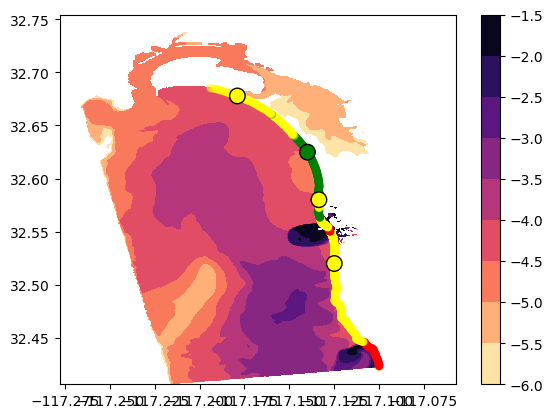

In [3]:
ds = nc.Dataset(fn_web)
shore = dict()
dye = dict()
sites = dict()
shore['Lat'] = ds.variables['shoreline_lat'][:]
shore['Lon'] = ds.variables['shoreline_lon'][:]
shore['Risk'] = ds.variables['shoreline_risk'][:]
dye['Lat'] = ds.variables['map_lat'][:]
dye['Lon'] = ds.variables['map_lon'][:]
dye['Dye_tot'] = ds.variables['map_dye_tot'][:]
sites['Lat'] = ds.variables['sites_lat'][:]
sites['Lon'] = ds.variables['sites_lon'][:]
sites['Risk'] = ds.variables['sites_risk'][:]


iit = 110 # the time index
# make the risk colormap
color_map = {
    0: 'green',
    1: 'yellow',
    2: 'red'
}
# associate the colormap with the numbers
# the .nc data is in 3 dictionaries
colors = [color_map[number] for number in shore['Risk'][iit,:]]
colors2 = [color_map[number] for number in sites['Risk'][iit,:]]

cmap = plt.get_cmap('magma_r')
plevs = np.arange(-6,-1,.5)

fig, ax = plt.subplots()
dye2 = dye['Dye_tot'][iit,:,:]
msk = dye2==0
dye2[msk]=0.0000000001
l10dye = np.log10(dye2)
cset=ax.contourf(dye['Lon'],dye['Lat'],l10dye, plevs, cmap=cmap)
cbar = fig.colorbar(cset, ax=ax, orientation='vertical', pad = 0.05)
ax.scatter(shore['Lon'],shore['Lat'], s=25, c=colors, alpha=0.5)
ax.scatter(sites['Lon'],sites['Lat'], s=125, c=colors2, alpha=0.99 , edgecolors='black', linewidths=1)


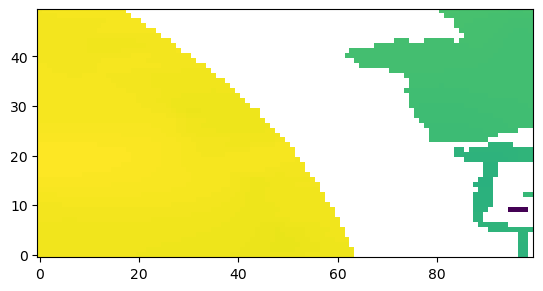

In [47]:
fig, ax = plt.subplots()
ax.imshow(l10dye[900:950,300:400], origin='lower')
#ax.imshow(l10dye[700:740,305:350], origin='lower')


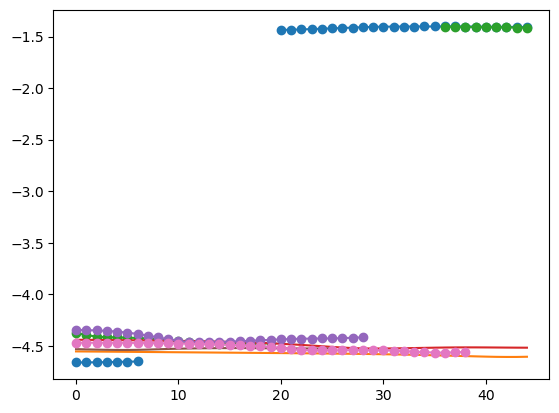

In [48]:
fig, ax = plt.subplots()
for ii in [700,720,740,760]:
    ax.plot(l10dye[ii,305:350],'-o')
    ax.plot(l10dye[ii+200,305:350])


In [ ]:

print(l10dye[700:702,305:350])


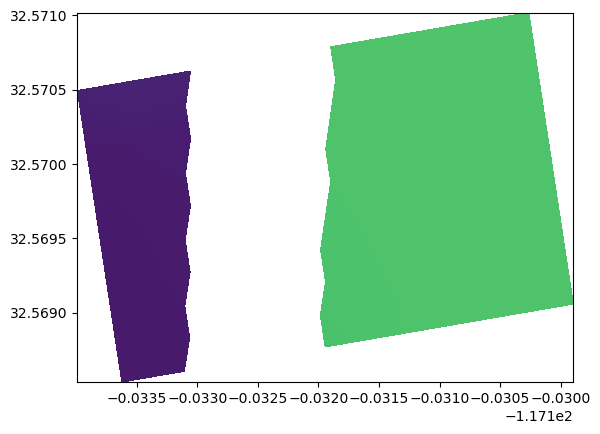

In [36]:
plevs2=np.linspace(-5,0,501)
fig, ax = plt.subplots()
cset=ax.contourf(dye['Lon'][700:710,305:350],dye['Lat'][700:710,305:350],l10dye[700:710,305:350], plevs2)


In [ ]:

## test river stuff here
Q2 = np.arange(0,300,.1)
R1 = 0.65
R2 = 0.045
Q00 = 2.25
WW1 = R1*Q2
WW2 = R2*Q2 + (R1-R2)*Q00
msk = Q2>Q00
WW1[msk] = WW2[msk]
dye2 = WW1 / Q2


fig, ax = plt.subplots()
ax.loglog(Q2,dye2)


In [ ]:
# gonna test popen and run here...
os.chdir('../sdpm_py_util')
cmd_list = ['python','-W','ignore','plotting_functions.py','test_popen','15','4']
ret6 = subprocess.Popen(cmd_list)
cmd_list = ['python','-W','ignore','plotting_functions.py','test_popen','4','10']
ret7 = subprocess.run(cmd_list)




testing. loop: 0  of  4
pausing  15  sec
testing. loop: 0  of  10
pausing  4  sec
testing. loop: 1  of  10
pausing  4  sec
testing. loop: 2  of  10
pausing  4  sec
testing. loop: 3  of  10
pausing  4  sec
testing. loop: 1  of  4
pausing  15  sec
testing. loop: 4  of  10
pausing  4  sec
testing. loop: 5  of  10
pausing  4  sec
testing. loop: 6  of  10
pausing  4  sec
testing. loop: 7  of  10
pausing  4  sec
testing. loop: 2  of  4
pausing  15  sec
testing. loop: 8  of  10
pausing  4  sec
testing. loop: 9  of  10
pausing  4  sec


testing. loop: 3  of  4
pausing  15  sec


In [56]:
fngrd = '/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV1_rx020_hmask.nc'
fnatm = '/scratch/PHM_Simulations/LV1_Forecast/Forc/LV1_ATM_FORCING.nc'
fnbc  = '/scratch/PHM_Simulations/LV1_Forecast/Forc/LV1_OCEAN_BC.nc'
fntide = '/scratch/matt/sdtjre_L1/roms_tide_adcirc_LV01.nc'
fnic = '/scratch/PHM_Simulations/LV1_Forecast/Forc/LV1_OCEAN_IC.nc'
grd = nc.Dataset(fngrd)
atm = nc.Dataset(fnatm)
bc = nc.Dataset(fnbc)
tide = nc.Dataset(fntide)
ic = nc.Dataset(fnic)
print(grd.variables.keys())
print(atm.variables.keys())
print(bc.variables.keys())
print(tide.variables.keys())
print(ic.variables.keys())



vars = tide.variables.keys()
for var in vars:
    print(np.shape(tide.variables[var][:]))


dict_keys(['xl', 'el', 'JPRJ', 'spherical', 'depthmin', 'depthmax', 'hraw', 'h', 'f', 'pm', 'pn', 'dndx', 'dmde', 'x_rho', 'y_rho', 'x_psi', 'y_psi', 'x_u', 'y_u', 'x_v', 'y_v', 'lat_rho', 'lon_rho', 'lat_psi', 'lon_psi', 'lat_u', 'lon_u', 'lat_v', 'lon_v', 'mask_rho', 'mask_u', 'mask_v', 'mask_psi', 'angle'])
dict_keys(['Tair', 'Pair', 'Qair', 'Uwind', 'Vwind', 'rain', 'swrad', 'lwrad', 'lwrad_down', 'lat', 'lon', 'ocean_time', 'tair_time', 'pair_time', 'qair_time', 'wind_time', 'rain_time', 'srf_time', 'lrf_time'])
dict_keys(['temp_south', 'salt_south', 'u_south', 'v_south', 'ubar_south', 'vbar_south', 'zeta_south', 'temp_north', 'salt_north', 'u_north', 'v_north', 'ubar_north', 'vbar_north', 'zeta_north', 'temp_west', 'salt_west', 'u_west', 'v_west', 'ubar_west', 'vbar_west', 'zeta_west', 'Vtransform', 'Vstretching', 'theta_s', 'theta_b', 'Tcline', 'hc', 'ocean_time', 'zeta_time', 'v2d_time', 'v3d_time', 'salt_time', 'temp_time', 'Cs_r'])
dict_keys(['tide_period', 'tide_Ephase', 'ti